In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('MetroPT3(AirCompressor).csv')

Информация об атрибутах:
Набор данных состоит из 15169480 точек данных, собранных с частотой 1 Гц с февраля по август 2020 года, и описывается 15 признаками от 7 аналоговых (1-7) и 8 цифровых (8-15) датчиков
1. TP2 (bar) – измерение давления в компрессоре.
2. TP3 (bar) – измерение давления, создаваемого на пневматической панели.
3. H1 (bar) – измерение давления, возникающего из-за перепада давления при разгрузке циклонного фильтра-сепаратора.
4. DV pressure (bar) – измерение перепада давления, возникающего при разгрузке осушителей воздуха в башнях; нулевое показание указывает на то, что компрессор работает под нагрузкой.
5. Reservoirs (bar) – измерение давления на выходе из резервуаров, которое должно быть близко к давлению пневматической панели (TP3).
6. Motor Current (A) – мера тока одной фазы трехфазного двигателя; имеет значения, близкие к 0А - при выключении, 4А - при работе без нагрузки, 7А - при работе под нагрузкой и 9А - при начале работы.
7. Oil Temperature (ºC) – измерение температуры масла на компрессоре.
8. COMP - электрический сигнал клапана впуска воздуха на компрессоре; он активен, когда нет впуска воздуха, что указывает на то, что компрессор либо выключен, либо работает в разгруженном состоянии.
9. DV electric – электрический сигнал, управляющий выпускным клапаном компрессора; он активен, когда компрессор работает под нагрузкой, и неактивен, когда компрессор выключен или работает в разгруженном состоянии.
10. TOWERS – электрический сигнал, определяющий башню, отвечающую за осушение воздуха, и башню, отвечающую за отвод влаги, удаленной из воздуха; когда он не активен, он указывает, что работает первая башня; когда активен, он указывает, что работает вторая башня.
11. MPG – электрический сигнал, отвечающий за запуск компрессора под нагрузкой путем активации впускного клапана, когда давление в блоке производства воздуха (APU) падает ниже 8,2 бар; он активирует датчик COMP, который принимает такое же поведение, как и датчик MPG.
12. LPS – электрический сигнал, который обнаруживает и активируется при падении давления ниже 7 бар.
13. Pressure Switch - электрический сигнал, определяющий разряжение в воздушно-сушильных башнях.
14. Oil Level – электрический сигнал, определяющий уровень масла в компрессоре; он активен, когда масло ниже ожидаемых значений.
15. Caudal Impulse – электрический сигнал, который подсчитывает импульсные выходы, создаваемые абсолютным количеством воздуха, поступающего из APU в резервуары

In [3]:
data.head(4)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1516948.0,7.584735e+06,4.379053e+06,0.000,3792367.500,7584735.000,1.137710e+07,1.516947e+07
TP2,1516948.0,1.367826e+00,3.250930e+00,-0.032,-0.014,-0.012,-1.000000e-02,1.067600e+01
TP3,1516948.0,8.984611e+00,6.390951e-01,0.730,8.492,8.960,9.492000e+00,1.030200e+01
H1,1516948.0,7.568155e+00,3.333200e+00,-0.036,8.254,8.784,9.374000e+00,1.028800e+01
DV_pressure,1516948.0,5.595619e-02,3.824015e-01,-0.032,-0.022,-0.020,-1.800000e-02,9.844000e+00
Reservoirs,1516948.0,8.985233e+00,6.383070e-01,0.712,8.494,8.960,9.492000e+00,1.030000e+01
Oil_temperature,1516948.0,6.264418e+01,6.516261e+00,15.400,57.775,62.700,6.725000e+01,8.905000e+01
Motor_current,1516948.0,2.050171e+00,2.302053e+00,0.020,0.040,0.045,3.807500e+00,9.295000e+00
COMP,1516948.0,8.369568e-01,3.694052e-01,0.000,1.000,1.000,1.000000e+00,1.000000e+00
DV_eletric,1516948.0,1.606106e-01,3.671716e-01,0.000,0.000,0.000,0.000000e+00,1.000000e+00


In [5]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [6]:
import matplotlib.pyplot as plt

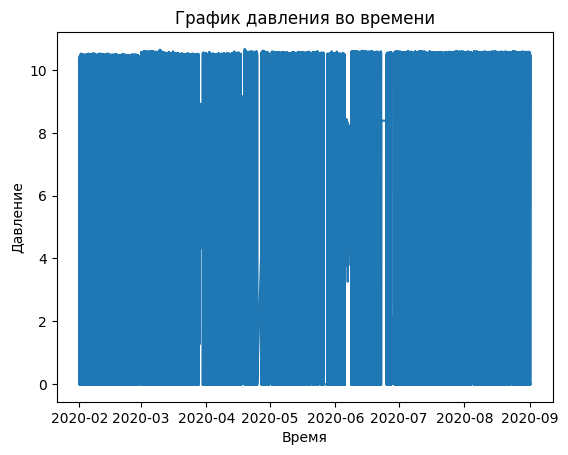

In [7]:
plt.plot(data['timestamp'], data['TP2'])

plt.xlabel('Время')
plt.ylabel('Давление')
plt.title('График давления во времени')

plt.show()

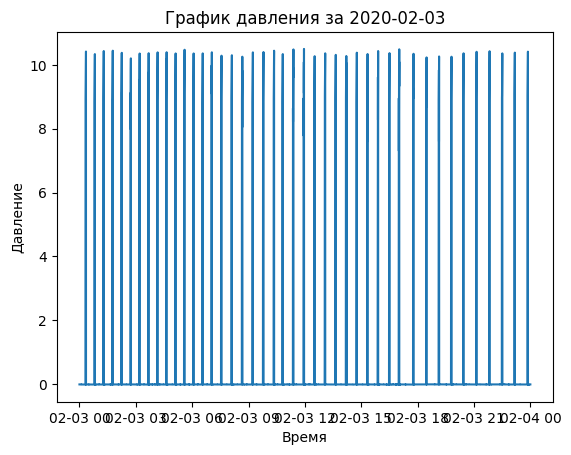

In [8]:
target_date = pd.to_datetime('2020-02-03')
df_day = data.loc[data['timestamp'].dt.date == target_date.date()]

plt.plot(df_day['timestamp'], df_day['TP2'])

plt.xlabel('Время')
plt.ylabel('Давление')
plt.title('График давления за {}'.format(target_date.date()))

plt.show()

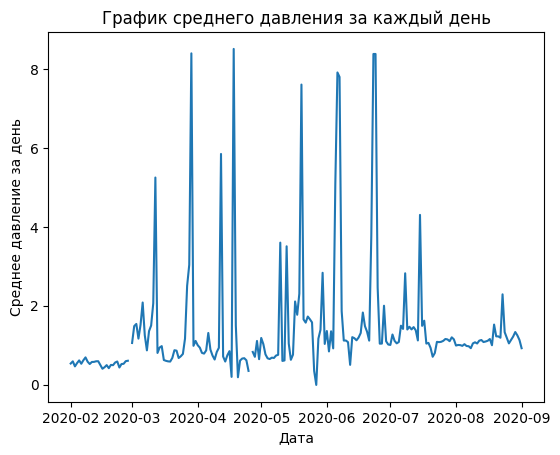

In [9]:
df_resampled = data.resample('D', on='timestamp').mean()

plt.plot(df_resampled.index, df_resampled['TP2'])

plt.xlabel('Дата')
plt.ylabel('Среднее давление за день')
plt.title('График среднего давления за каждый день')

plt.show()

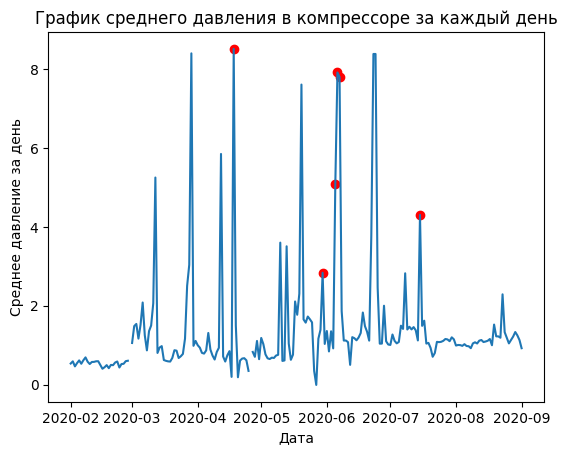

In [10]:
df_resampled = data.resample('D', on='timestamp').mean()

plt.plot(df_resampled.index, df_resampled['TP2'])

highlighted_dates = ['4/18/2020', '5/30/2020', '6/5/2020', '6/6/2020', '6/7/2020', '7/15/2020']
highlighted_dates = pd.to_datetime(highlighted_dates, format='%m/%d/%Y')

highlighted_values = df_resampled.loc[df_resampled.index.isin(highlighted_dates)]
plt.scatter(highlighted_values.index, highlighted_values['TP2'], color='red')

plt.xlabel('Дата')
plt.ylabel('Среднее давление за день')
plt.title('График среднего давления в компрессоре за каждый день')

plt.show()

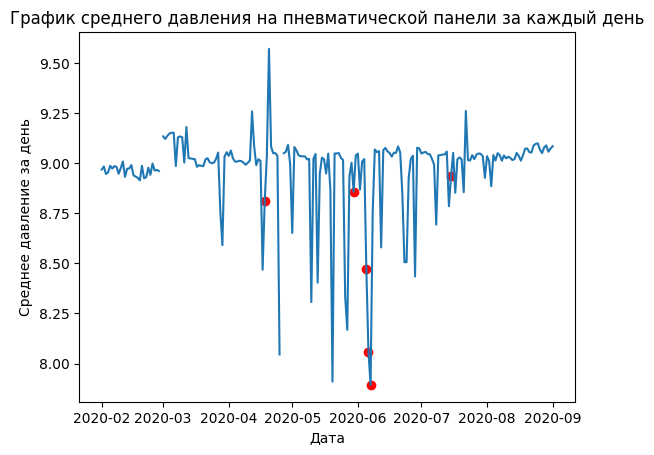

In [11]:
df_resampled = data.resample('D', on='timestamp').mean()

plt.plot(df_resampled.index, df_resampled['TP3'])

highlighted_dates = ['4/18/2020', '5/30/2020', '6/5/2020', '6/6/2020', '6/7/2020', '7/15/2020']
highlighted_dates = pd.to_datetime(highlighted_dates, format='%m/%d/%Y')

highlighted_values = df_resampled.loc[df_resampled.index.isin(highlighted_dates)]
plt.scatter(highlighted_values.index, highlighted_values['TP3'], color='red')

plt.xlabel('Дата')
plt.ylabel('Среднее давление за день')
plt.title('График среднего давления на пневматической панели за каждый день')

plt.show()

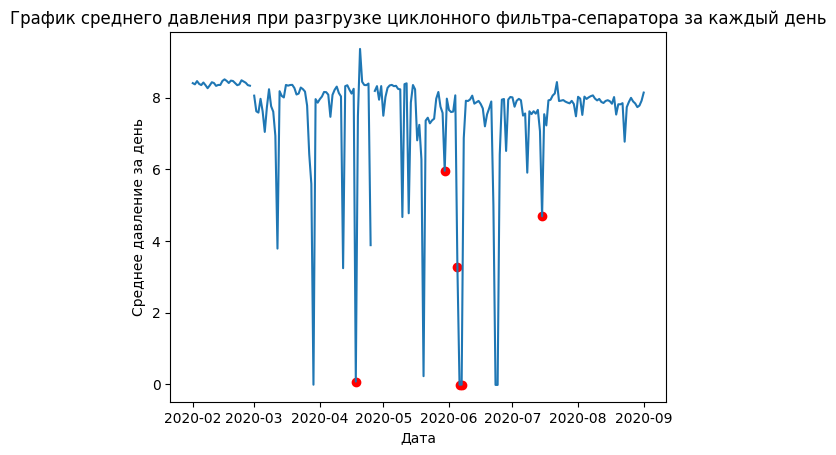

In [17]:
plt.plot(df_resampled.index, df_resampled['H1'])

highlighted_dates = ['4/18/2020', '5/30/2020', '6/5/2020', '6/6/2020', '6/7/2020', '7/15/2020']
highlighted_dates = pd.to_datetime(highlighted_dates, format='%m/%d/%Y')

highlighted_values = df_resampled.loc[df_resampled.index.isin(highlighted_dates)]
plt.scatter(highlighted_values.index, highlighted_values['H1'], color='red')

plt.xlabel('Дата')
plt.ylabel('Среднее давление за день')
plt.title('График среднего давления при разгрузке циклонного фильтра-сепаратора за каждый день')

plt.show()

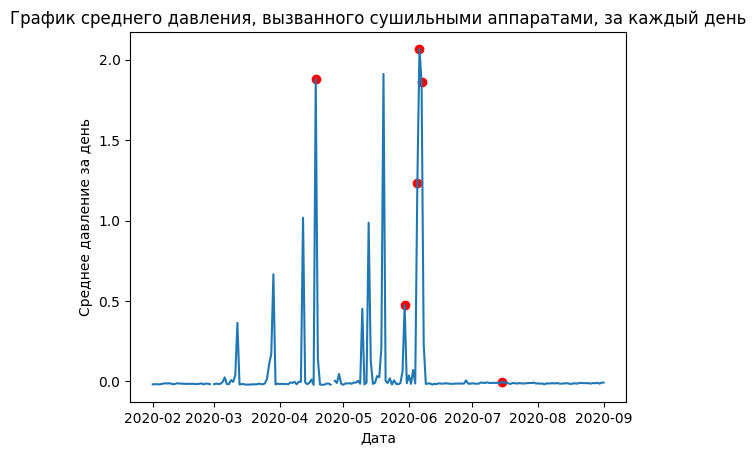

In [18]:
plt.plot(df_resampled.index, df_resampled['DV_pressure'])

highlighted_dates = ['4/18/2020', '5/30/2020', '6/5/2020', '6/6/2020', '6/7/2020', '7/15/2020']
highlighted_dates = pd.to_datetime(highlighted_dates, format='%m/%d/%Y')

highlighted_values = df_resampled.loc[df_resampled.index.isin(highlighted_dates)]
plt.scatter(highlighted_values.index, highlighted_values['DV_pressure'], color='red')

plt.xlabel('Дата')
plt.ylabel('Среднее давление за день')
plt.title('График среднего давления, вызванного сушильными аппаратами, за каждый день')

plt.show()

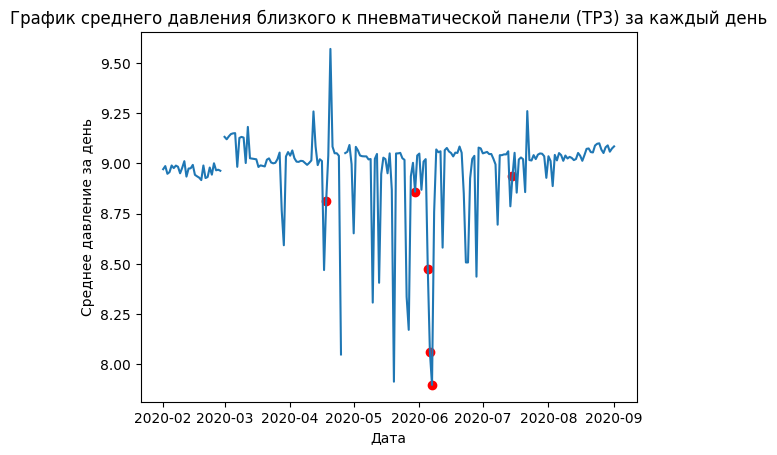

In [19]:
plt.plot(df_resampled.index, df_resampled['Reservoirs'])

highlighted_dates = ['4/18/2020', '5/30/2020', '6/5/2020', '6/6/2020', '6/7/2020', '7/15/2020']
highlighted_dates = pd.to_datetime(highlighted_dates, format='%m/%d/%Y')

highlighted_values = df_resampled.loc[df_resampled.index.isin(highlighted_dates)]
plt.scatter(highlighted_values.index, highlighted_values['Reservoirs'], color='red')

plt.xlabel('Дата')
plt.ylabel('Среднее давление за день')
plt.title('График среднего давления близкого к пневматической панели (TP3) за каждый день')

plt.show()

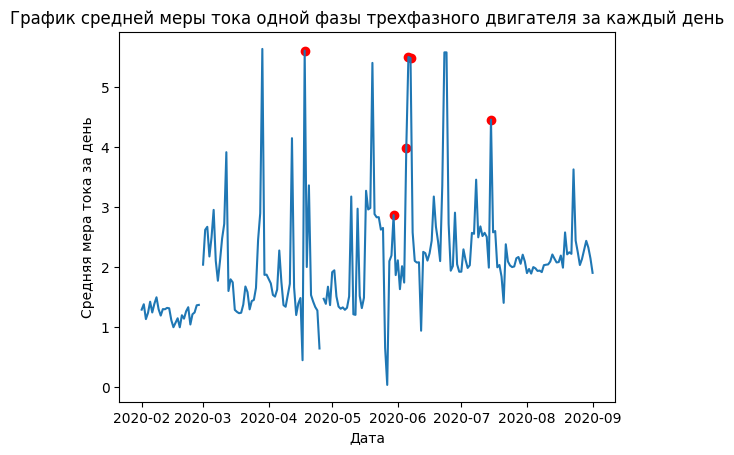

In [15]:
plt.plot(df_resampled.index, df_resampled['Motor_current'])

highlighted_dates = ['4/18/2020', '5/30/2020', '6/5/2020', '6/6/2020', '6/7/2020', '7/15/2020']
highlighted_dates = pd.to_datetime(highlighted_dates, format='%m/%d/%Y')

highlighted_values = df_resampled.loc[df_resampled.index.isin(highlighted_dates)]
plt.scatter(highlighted_values.index, highlighted_values['Motor_current'], color='red')

plt.xlabel('Дата')
plt.ylabel('Средняя мера тока за день')
plt.title('График средней меры тока одной фазы трехфазного двигателя за каждый день')

plt.show()

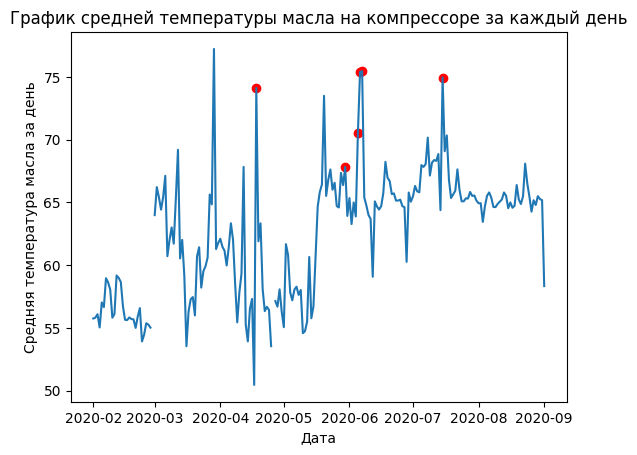

In [16]:
plt.plot(df_resampled.index, df_resampled['Oil_temperature'])

highlighted_dates = ['4/18/2020', '5/30/2020', '6/5/2020', '6/6/2020', '6/7/2020', '7/15/2020']
highlighted_dates = pd.to_datetime(highlighted_dates, format='%m/%d/%Y')

highlighted_values = df_resampled.loc[df_resampled.index.isin(highlighted_dates)]
plt.scatter(highlighted_values.index, highlighted_values['Oil_temperature'], color='red')

plt.xlabel('Дата')
plt.ylabel('Средняя температура масла за день')
plt.title('График средней температуры масла на компрессоре за каждый день')

plt.show()